In [1]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
from util import set_default_style

set_default_style(font_scale=1.5)

/var/folders/b4/gwkwsdb93sv11rtztqbm3l040000gn/T/ipykernel_9742/451837550.py:11: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=all_results_df, x='lambda', y='union_edges', hue='type',
/var/folders/b4/gwkwsdb93sv11rtztqbm3l040000gn/T/ipykernel_9742/451837550.py:19: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=all_results_df, x='lambda', y='node_union', hue='type',
/var/folders/b4/gwkwsdb93sv11rtztqbm3l040000gn/T/ipykernel_9742/451837550.py:27: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=all_results_df, x='lambda', y='intersection_edges', hue='type',
/var/folders/b4/gwkwsdb93sv11rtztqbm3l040000gn/T/ipykernel_9742/451837550.py:35: UserWarning: 
The markers list has fewer values (1) than n

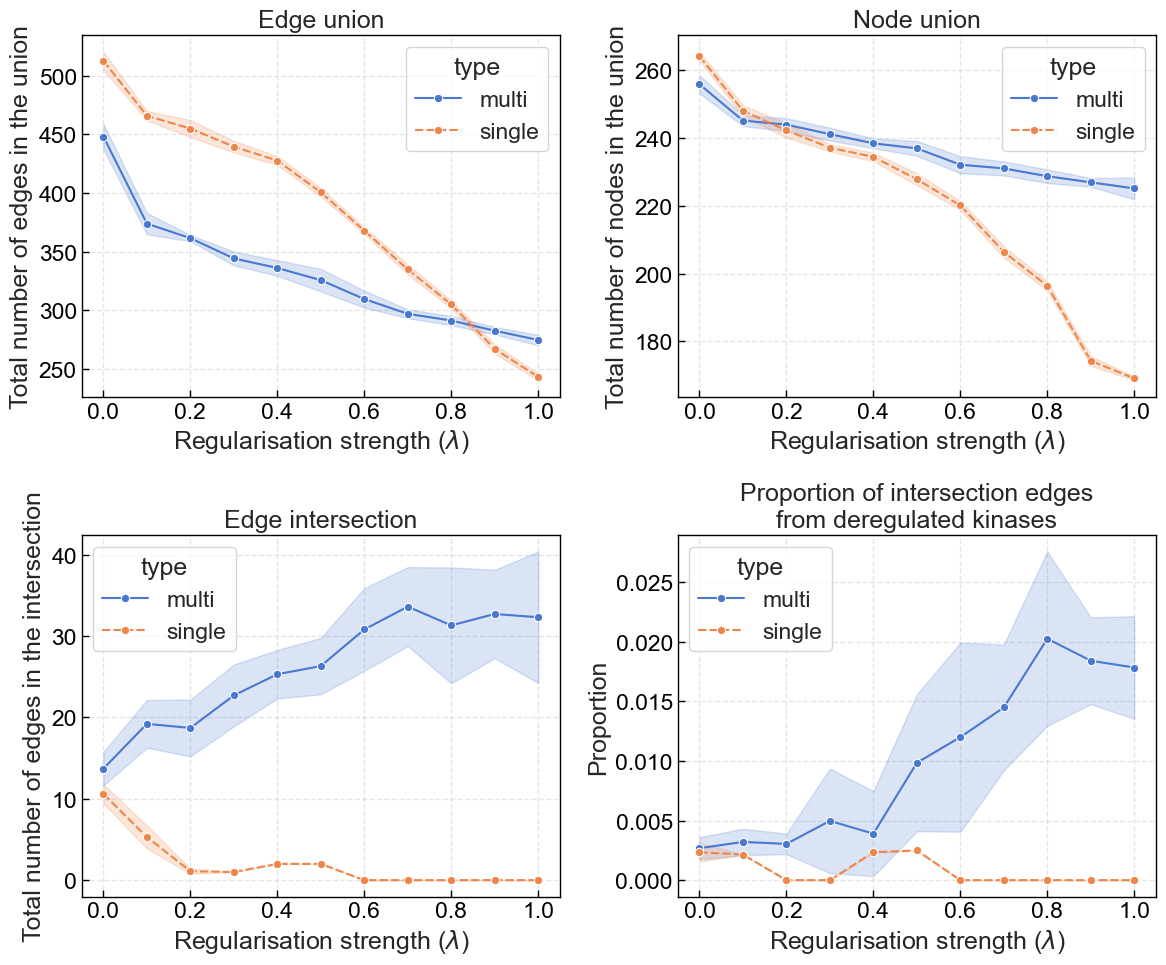

In [5]:
all_results_df = pd.read_csv("results.csv", index_col=0)

# Define the desired order for the 'type' variable:
order = ['multi', 'single']

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Plot each metric with the shaded uncertainty using errorbar=('ci', 95)
sns.lineplot(data=all_results_df, x='lambda', y='union_edges', hue='type',
             hue_order=order,
             style='type', style_order=order,
             markers='o', estimator=np.mean, errorbar=('sd'), ax=axs[0])
axs[0].set_title('Edge union')
axs[0].set_xlabel("Regularisation strength ($\\lambda$)")
axs[0].set_ylabel("Total number of edges in the union")

sns.lineplot(data=all_results_df, x='lambda', y='node_union', hue='type',
             hue_order=order,
             style='type', style_order=order,
             markers='o', estimator=np.mean, errorbar=('sd'), ax=axs[1])
axs[1].set_title('Node union')
axs[1].set_xlabel("Regularisation strength ($\\lambda$)")
axs[1].set_ylabel("Total number of nodes in the union")

sns.lineplot(data=all_results_df, x='lambda', y='intersection_edges', hue='type',
             hue_order=order,
             style='type', style_order=order,
             markers='o', estimator=np.mean, errorbar=('sd'), ax=axs[2])
axs[2].set_title('Edge intersection')
axs[2].set_xlabel("Regularisation strength ($\\lambda$)")
axs[2].set_ylabel("Total number of edges in the intersection")

sns.lineplot(data=all_results_df, x='lambda', y='jaccard', hue='type',
             hue_order=order,
             style='type', style_order=order,
             markers='o', estimator=np.mean, errorbar=('sd'), ax=axs[3])
axs[3].set_title('Proportion of intersection edges\nfrom deregulated kinases')
axs[3].set_xlabel("Regularisation strength ($\\lambda$)")
axs[3].set_ylabel("Proportion")

plt.tight_layout()
plt.savefig("results.pdf")